<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [ ]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [77]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-08 18:54:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  40.9MB/s    in 3.7s    

2025-07-08 18:54:12 (40.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


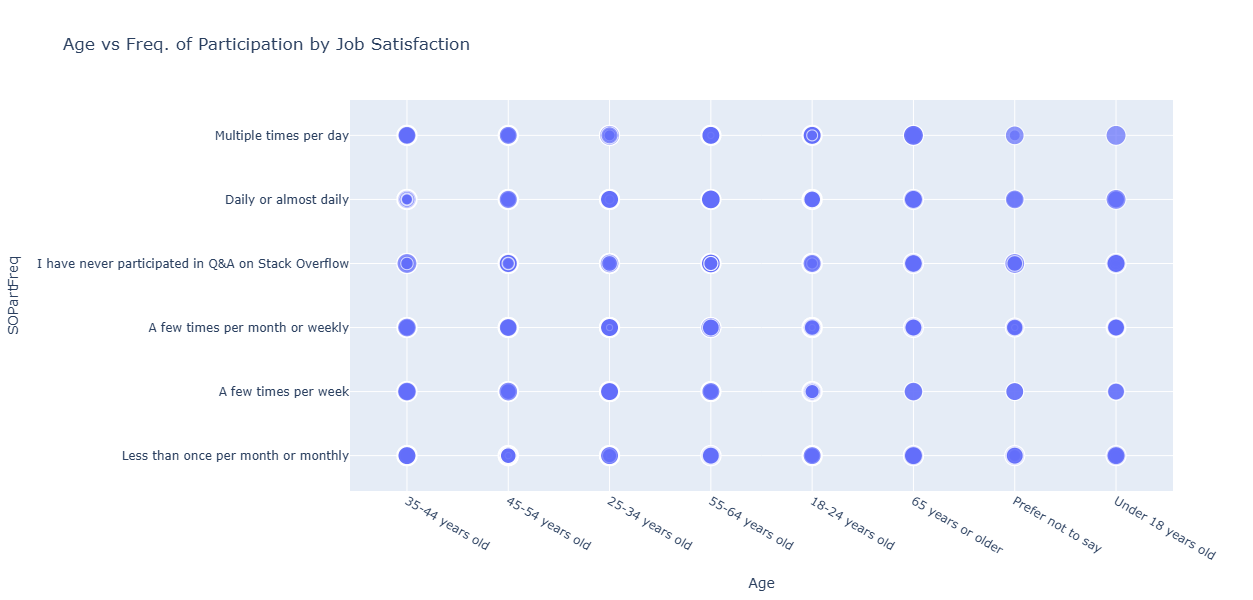

In [78]:
df_new = df.dropna(subset=['SOPartFreq', 'JobSat'])

fig = px.scatter(df_new, x='Age', y='SOPartFreq', size='JobSat', title='Age vs Freq. of Participation by Job Satisfaction', hover_name='JobSat', width = 900,height=600)
fig.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


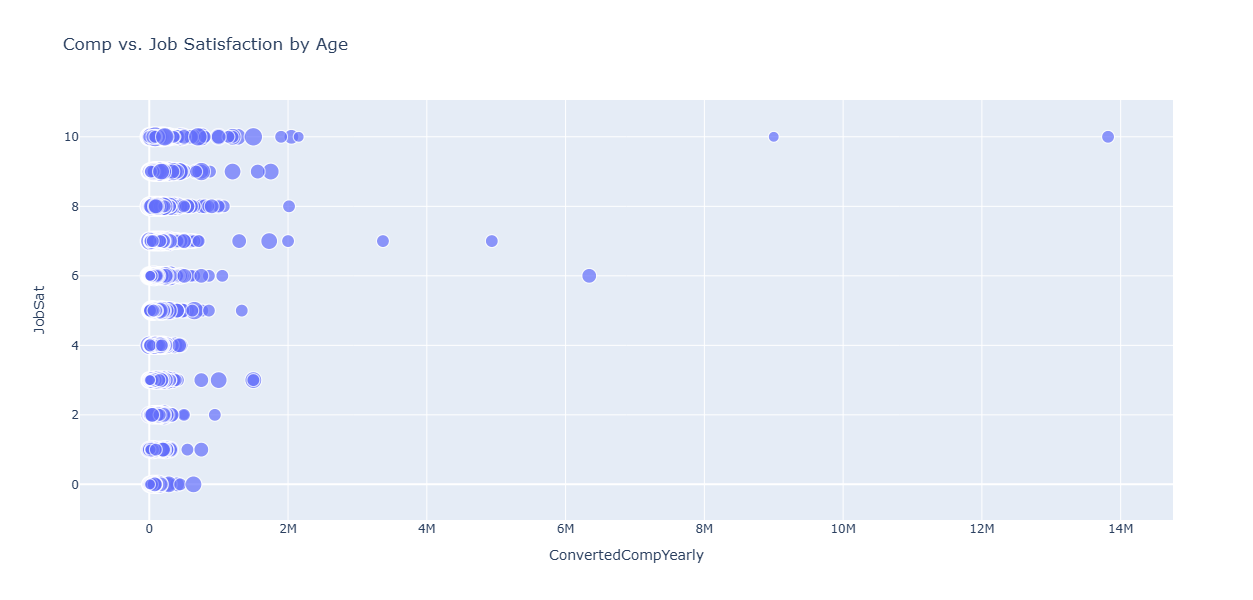

In [88]:
df_age =df[['ConvertedCompYearly', 'JobSat', 'Age']].copy()
age_map = {'Under 18 years old': 15,
          '18-24 years old': 21,
          '25-34 years old': 29.5,
          '35-44 years old': 39.5,
          '45-54 years old': 49.5,
          '55-64 years old': 59.5,
          '65 years or older': 69.5,
        }
df_age['Age']=df_age['Age'].map(age_map)
df_age['Age'] = df_age['Age'].fillna(df_age['Age'].mode()[0])

df_age = df_age.dropna(subset=['ConvertedCompYearly', 'JobSat'])

fig = px.scatter(df_age, x='ConvertedCompYearly', y='JobSat', size='Age', title='Comp vs. Job Satisfaction by Age', height=600)
fig.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_300/1374656235.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



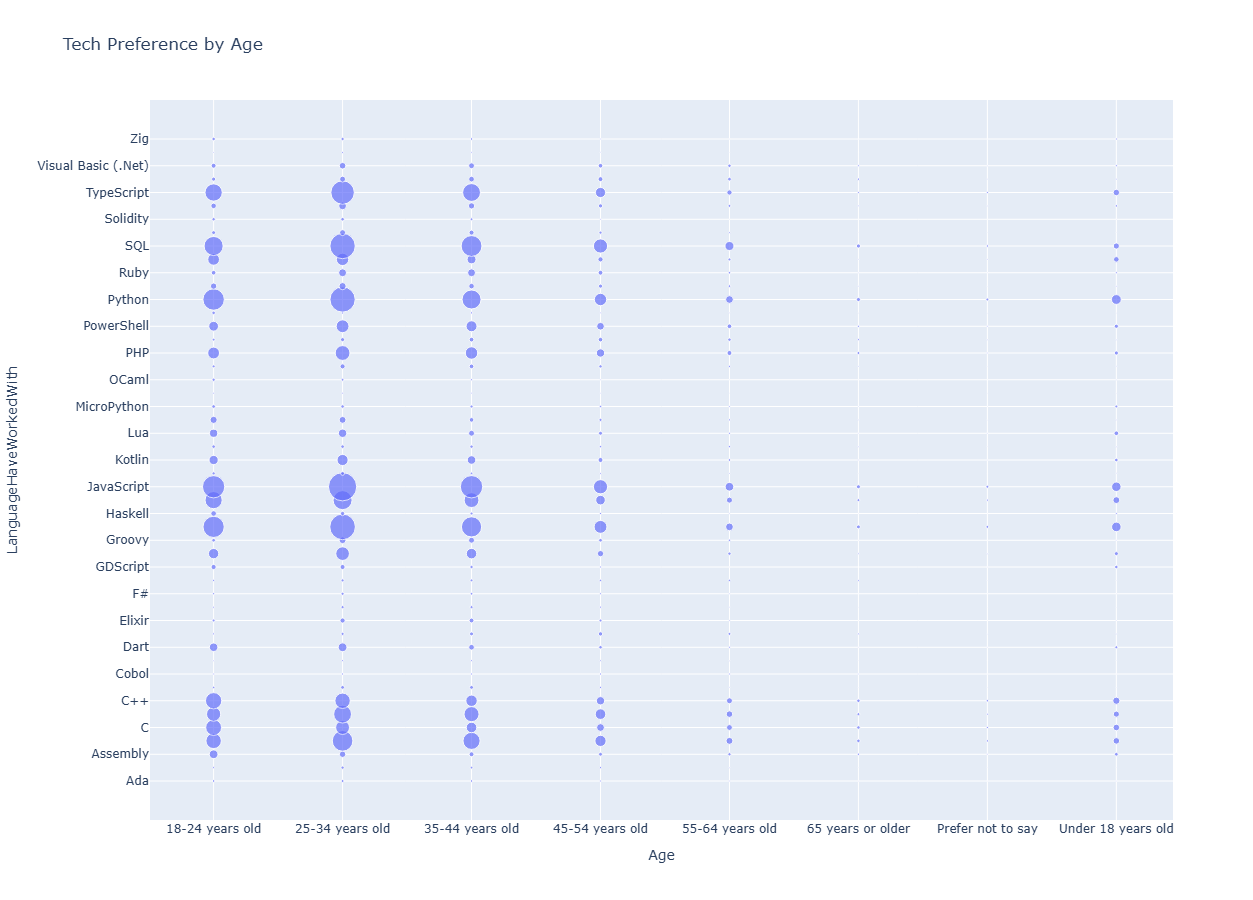

In [105]:
df_tech = df[['LanguageHaveWorkedWith', 'Age']]
df_tech['LanguageHaveWorkedWith'] = df_tech['LanguageHaveWorkedWith'].str.split(';')
df_tech = df_tech.explode('LanguageHaveWorkedWith')

df_tech = df_tech.dropna(subset=['LanguageHaveWorkedWith'])
df_tech = df_tech.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

fig = px.scatter(df_tech, x='Age', y='LanguageHaveWorkedWith', size = 'Count', height=900, title= 'Tech Preference by Age')
fig.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


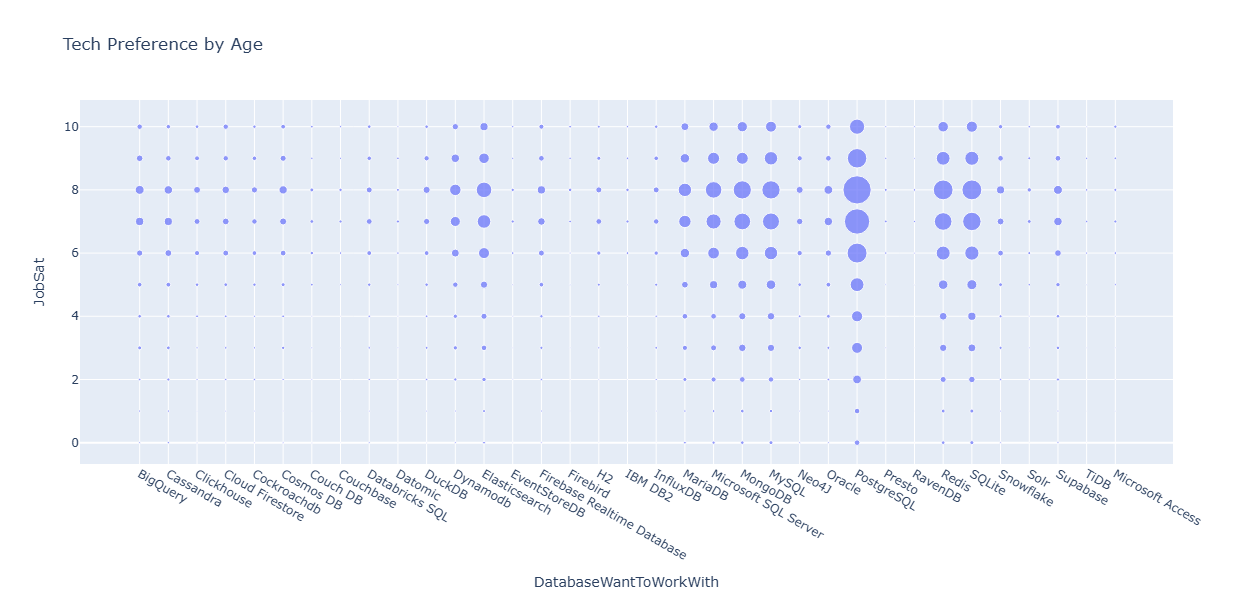

In [142]:
df_data = df[['DatabaseWantToWorkWith', 'JobSat']].copy()
df_data['DatabaseWantToWorkWith'] = df_data['DatabaseWantToWorkWith'].str.split(';')
df_data = df_data.explode('DatabaseWantToWorkWith')
df_data = df_data.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

count = df_data.groupby(['JobSat', 'DatabaseWantToWorkWith']).size().reset_index(name='count')

fig = px.scatter(count, x='DatabaseWantToWorkWith', y='JobSat', size='count', height=600, title='Tech Preference by Age')
fig.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


                   DevType  ConvertedCompYearly  JobSat
0      Academic researcher                  6.0    10.0
1      Academic researcher                 26.0     8.0
2      Academic researcher                 70.0     8.0
3      Academic researcher                133.0     1.0
4      Academic researcher                592.0     9.0
...                    ...                  ...     ...
9318  System administrator             130000.0     7.0
9319  System administrator             136000.0     3.0
9320  System administrator             138000.0     0.0
9321  System administrator             155000.0     4.0
9322  System administrator             325000.0     6.0

[9323 rows x 3 columns]


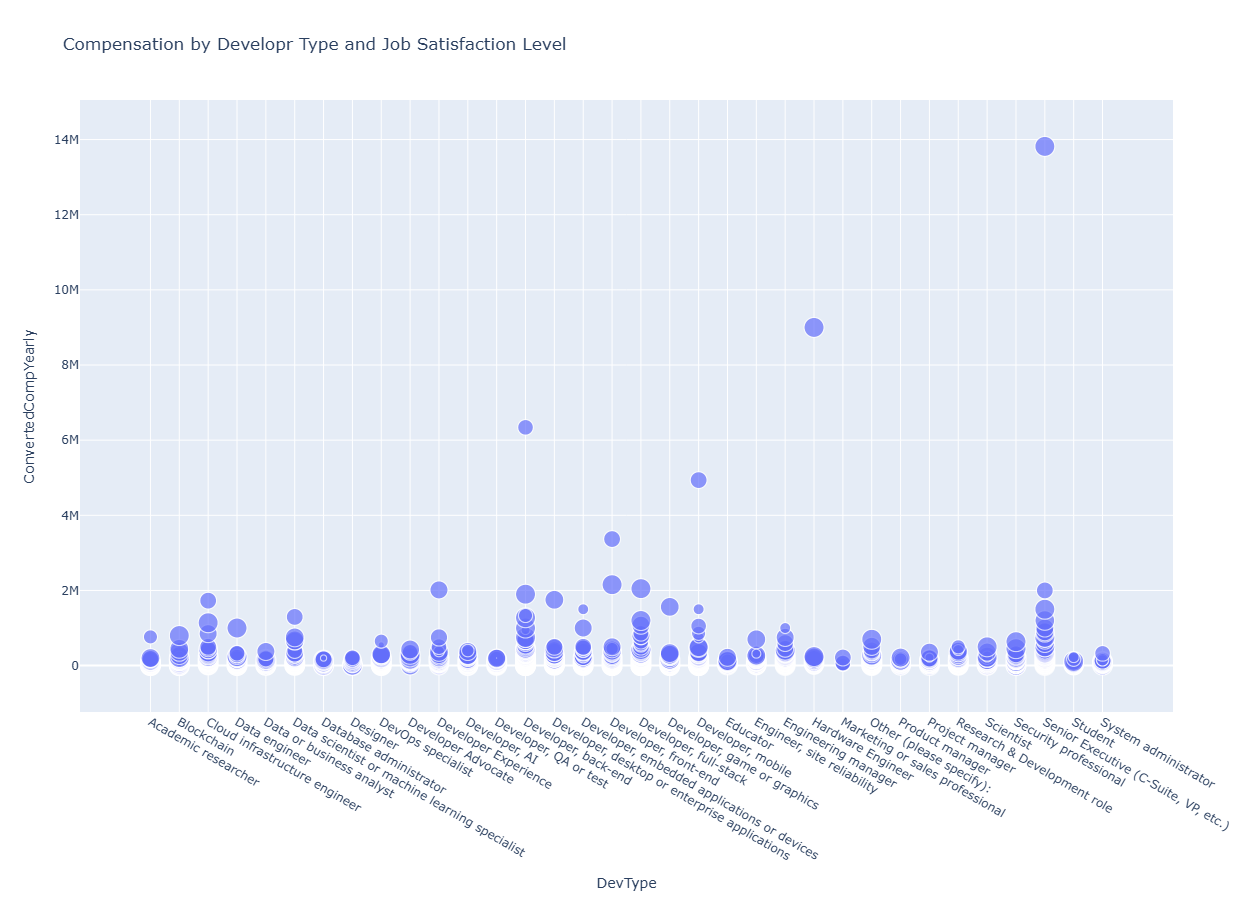

In [154]:
df_comp = df[['ConvertedCompYearly', 'DevType', 'JobSat']]
df_comp = df_comp.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSat'])

df_comp1 = df_comp.groupby(['DevType', 'ConvertedCompYearly'])['JobSat'].mean().reset_index()
print(df_comp1)

fig = px.scatter(df_comp1, x='DevType', y='ConvertedCompYearly', size='JobSat', height=900, title='Compensation by Developr Type and Job Satisfaction Level')
fig.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


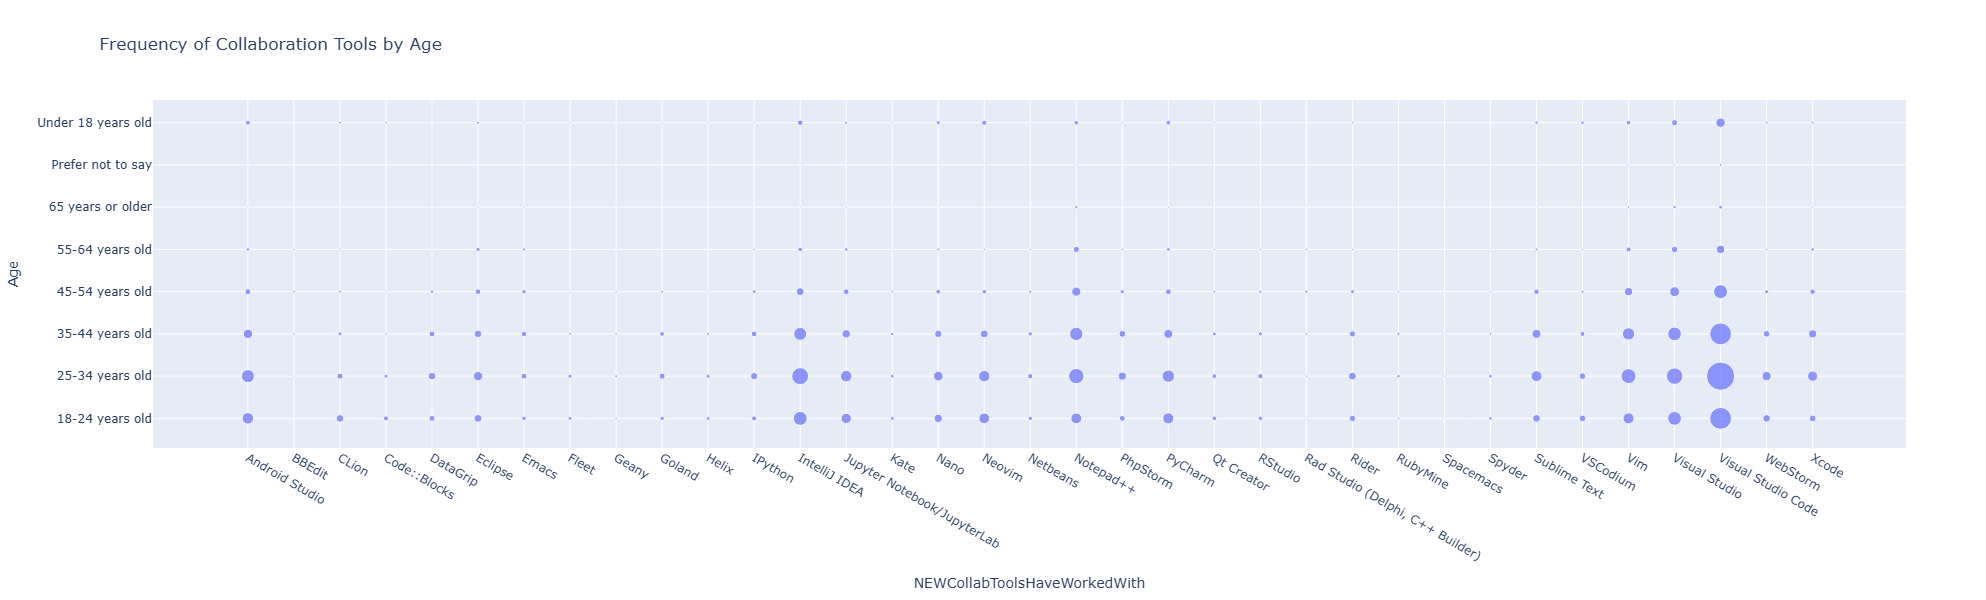

In [167]:
df_tool = df[['NEWCollabToolsHaveWorkedWith', 'Age']]
df_tool = df_tool.dropna(subset=['NEWCollabToolsHaveWorkedWith','Age'])
df_tool['NEWCollabToolsHaveWorkedWith'] = df_tool['NEWCollabToolsHaveWorkedWith'].str.split(';') 
df_tool= df_tool.explode('NEWCollabToolsHaveWorkedWith')

df_tool = df_tool.groupby(['NEWCollabToolsHaveWorkedWith', 'Age']).size().reset_index(name='count')

fig = px.scatter(df_tool, x='NEWCollabToolsHaveWorkedWith', y='Age', size='count', title='Frequency of Collaboration Tools by Age', width = 1200, height=600)
fig.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



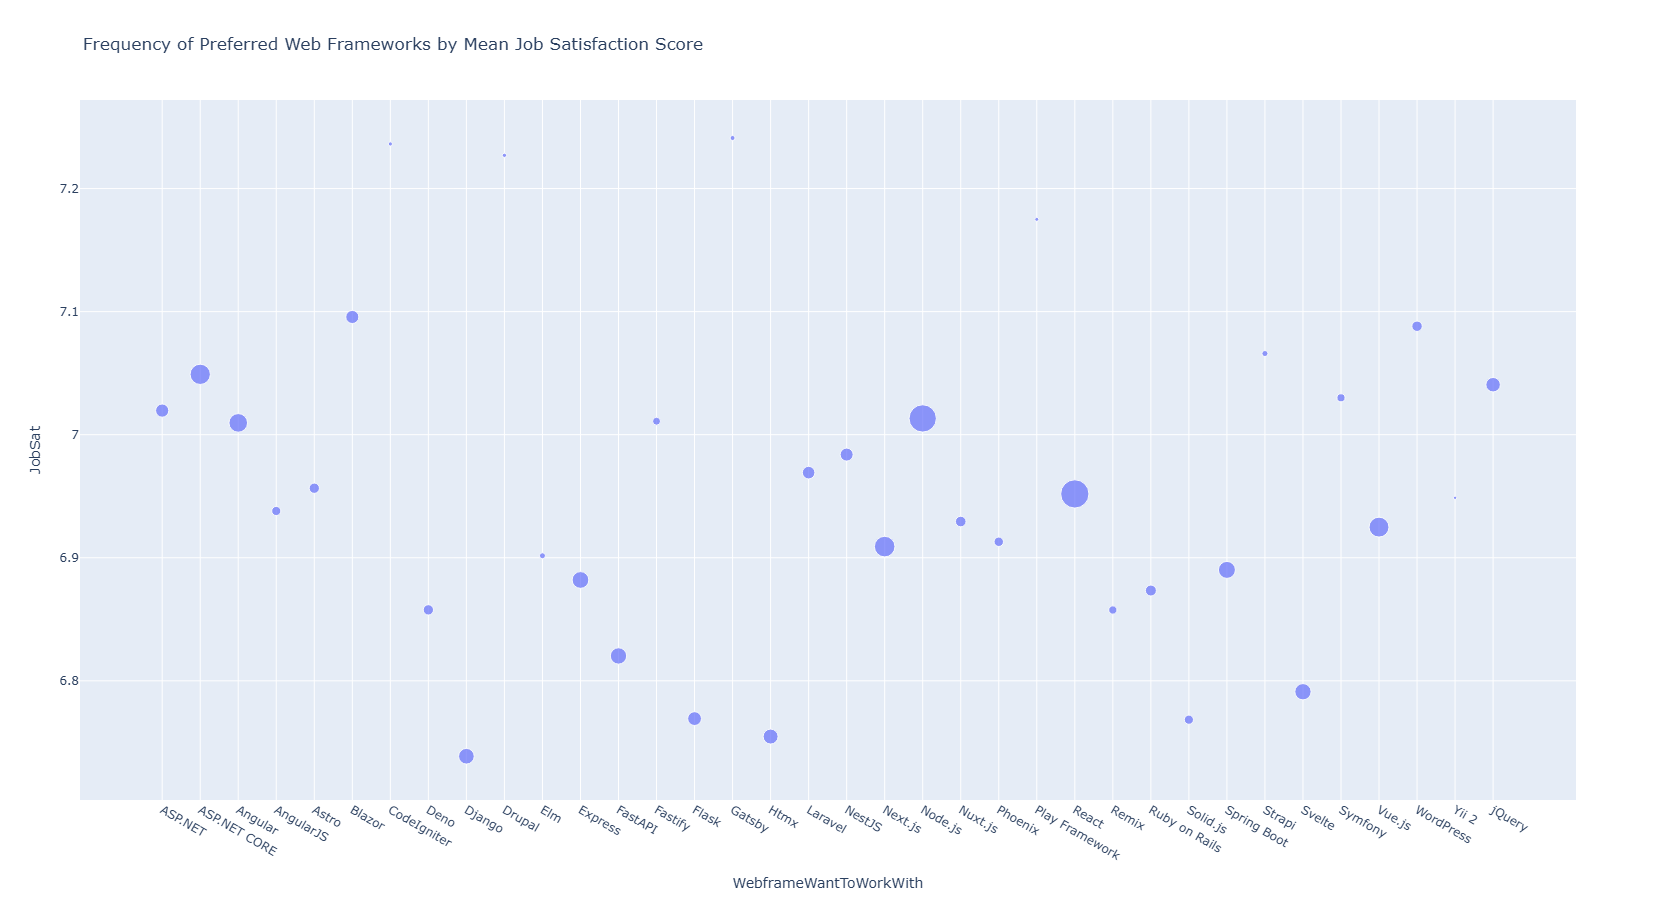

In [181]:
df_pref = df[['WebframeWantToWorkWith', 'JobSat']]
df_pref = df_pref.dropna(subset=['WebframeWantToWorkWith','JobSat'])
df_pref['WebframeWantToWorkWith'] = df_pref['WebframeWantToWorkWith'].str.split(';') 
df_pref= df_pref.explode('WebframeWantToWorkWith')

mean = df_pref.groupby('WebframeWantToWorkWith')['JobSat'].mean().reset_index()
count = df_pref.groupby('WebframeWantToWorkWith').size().reset_index(name='count')

df_merge = mean.merge(count, on='WebframeWantToWorkWith')
fig = px.scatter(df_merge, x='WebframeWantToWorkWith', y='JobSat', size='count', title='Frequency of Preferred Web Frameworks by Mean Job Satisfaction Score', height=900)
fig.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
df_ad = df[['LanguageAdmired', 'Country']].copy()
df_ad['LanguageAdmired'] = df_ad['LanguageAdmired'].str.split(';')
df_ad = df_ad.explode('LanguageAdmired')
df_ad = df_ad.dropna(subset=('LanguageAdmired', 'Country'))

df_ad = df_ad.groupby(['LanguageAdmired','Country']).size().reset_index(name='count')

fig = px.scatter(df_ad, x='Country', y='LanguageAdmired', size='count', title='Most Admired Tech in Each Country')
fig.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
